In [120]:
import numpy as np
import pandas as pd
import joblib

In [121]:
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [122]:
df.shape

(1599, 12)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Finding Misssing Data

In [124]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Finding and dropping any duplicated row/column 

In [125]:
df.duplicated().sum()

240

In [126]:
df=df.drop_duplicates(keep='first')
df.shape

(1359, 12)

## Mathematical Insight on numerical data

In [127]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Exploring The Data 

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

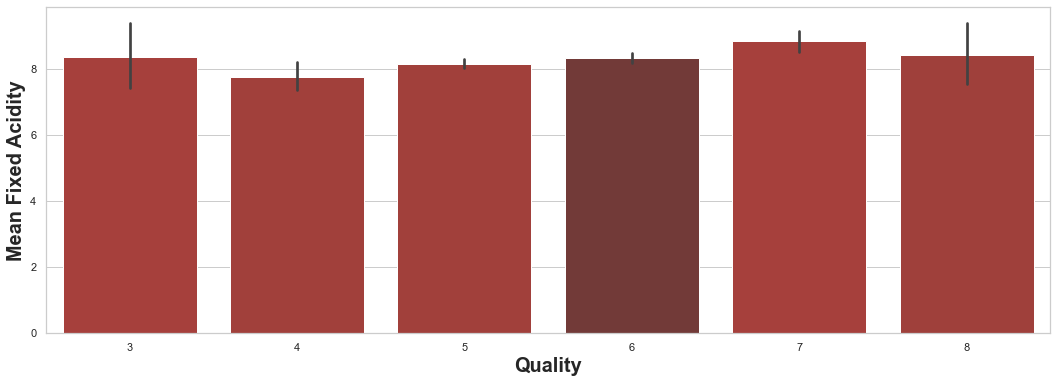

In [129]:
# fixed acidity vs Quality
plot = plt.figure(figsize=(18,6))
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Reds_d", len(df))
array=df['fixed acidity']
rank = [int((max(array)-elem)*len(df)*0.75/(max(array)+1)) for elem in array] 
sns.barplot(x=df['quality'], y=df['fixed acidity'], data=df, palette=np.array(pal[::-1])[rank])
plt.xlabel('Quality', weight='bold', fontsize=20) 
plt.ylabel('Mean Fixed Acidity', weight='bold', fontsize=20)
plt.show()

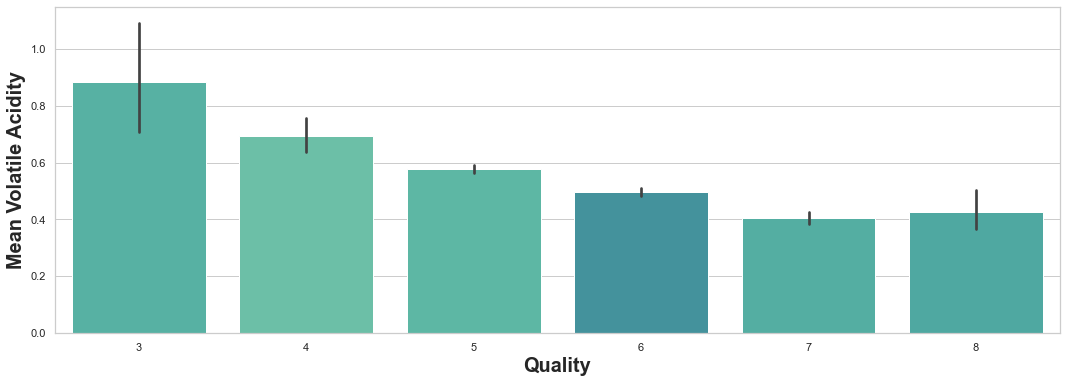

In [130]:
# volatile acidity vs Quality

plot = plt.figure(figsize=(18,6))
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("mako", len(df))
array=df['volatile acidity']
rank = [int((max(array)-elem)*len(df)*0.75/(max(array)+1)) for elem in array] 
sns.barplot(x=df['quality'], y=df['volatile acidity'], data=df, palette=np.array(pal[::-1])[rank])
plt.xlabel('Quality', weight='bold', fontsize=20) 
plt.ylabel('Mean Volatile Acidity', weight='bold', fontsize=20) 
plt.show()

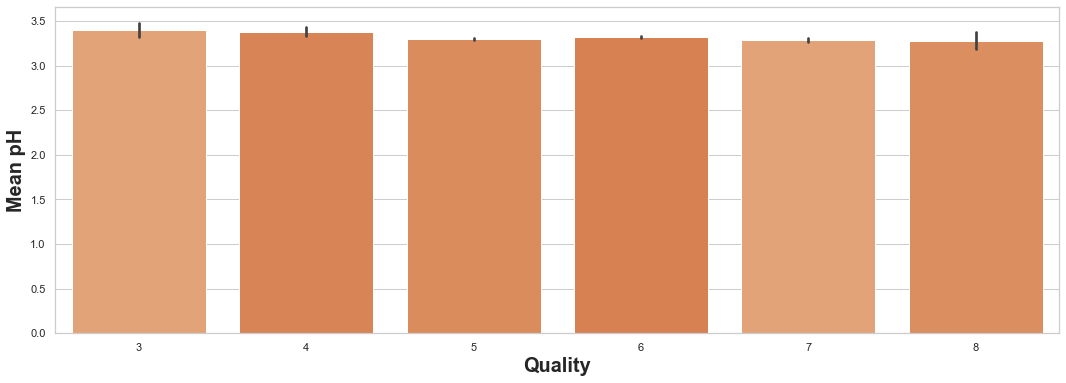

In [131]:
# pH vs Quality

plot = plt.figure(figsize=(18,6))
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("icefire", len(df))
array=df['pH']
rank = [int((max(array)-elem)*len(df)*0.75/(max(array)+1)) for elem in array] 
sns.barplot(x=df['quality'], y=df['pH'], data=df, palette=np.array(pal[::-1])[rank])
plt.xlabel('Quality',weight='bold', fontsize=20) 
plt.ylabel('Mean pH', weight='bold', fontsize=20) 
plt.show()

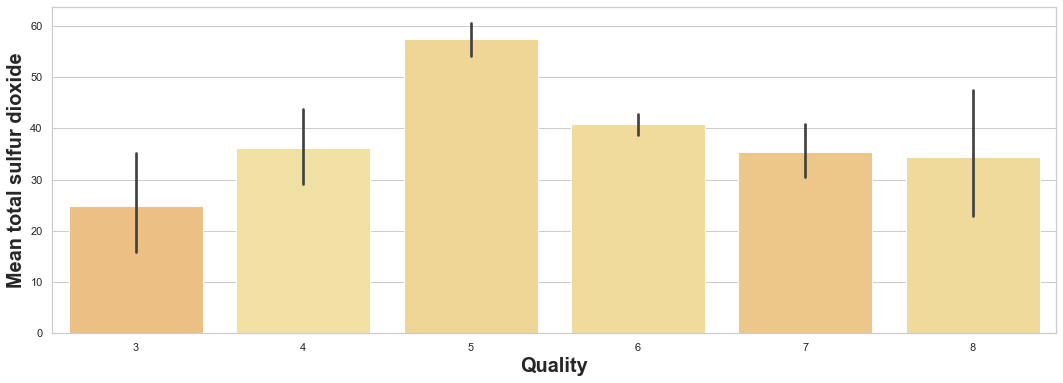

In [132]:
# total sulfur dioxide vs Quality

plot = plt.figure(figsize=(18,6))
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Spectral", len(df))
array=df['total sulfur dioxide']
rank = [int((max(array)-elem)*len(df)*0.75/(max(array)+1)) for elem in array] 
sns.barplot(x=df['quality'], y=df['total sulfur dioxide'], data=df, palette=np.array(pal[::-1])[rank])
plt.xlabel('Quality',weight='bold', fontsize=20) 
plt.ylabel('Mean total sulfur dioxide', weight='bold', fontsize=20) 
plt.show()

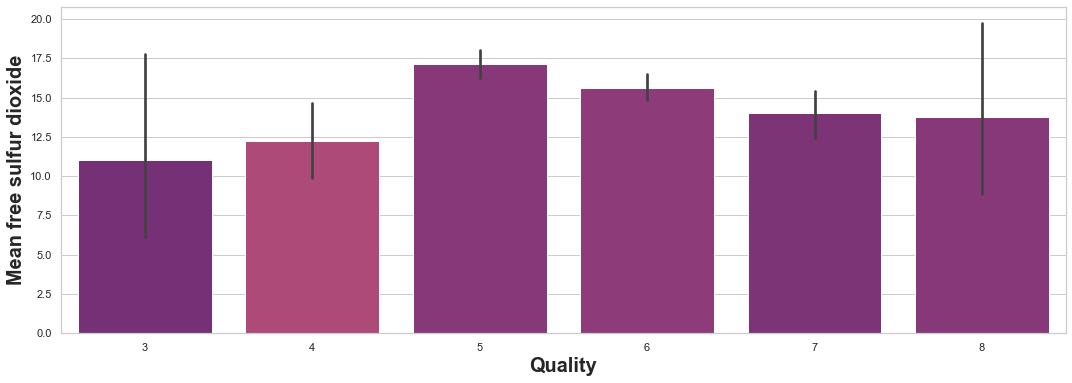

In [133]:
# free sulfur dioxide vs Quality

plot = plt.figure(figsize=(18,6))
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("magma", len(df))
array=df['free sulfur dioxide']
rank = [int((max(array)-elem)*len(df)*0.75/(max(array)+1)) for elem in array] 
sns.barplot(x=df['quality'], y=df['free sulfur dioxide'], data=df, palette=np.array(pal[::-1])[rank])
plt.xlabel('Quality',weight='bold', fontsize=20) 
plt.ylabel('Mean free sulfur dioxide', weight='bold', fontsize=20) 
plt.show()

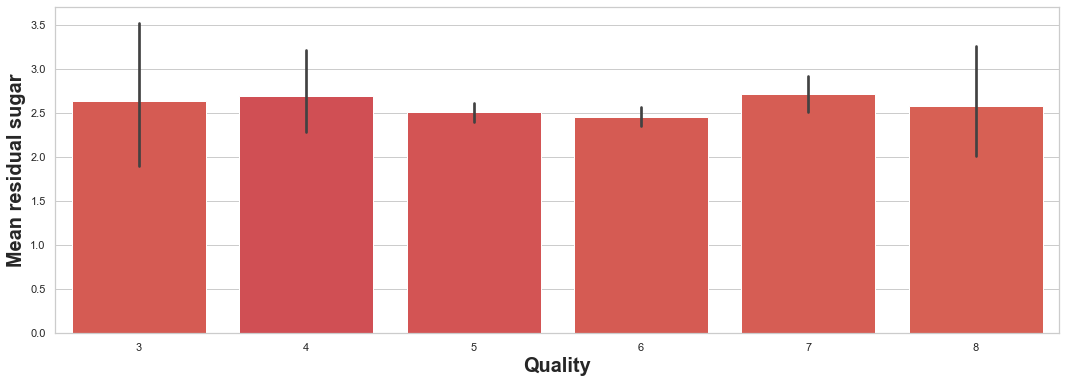

In [134]:
# residual sugar vs Quality

plot = plt.figure(figsize=(18,6))
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("rocket_r", len(df))
array=df['residual sugar']
rank = [int((max(array)-elem)*len(df)*0.75/(max(array)+1)) for elem in array] 
sns.barplot(x=df['quality'], y=df['residual sugar'], data=df, palette=np.array(pal[::-1])[rank])
plt.xlabel('Quality',weight='bold', fontsize=20) 
plt.ylabel('Mean residual sugar', weight='bold', fontsize=20) 
plt.show()

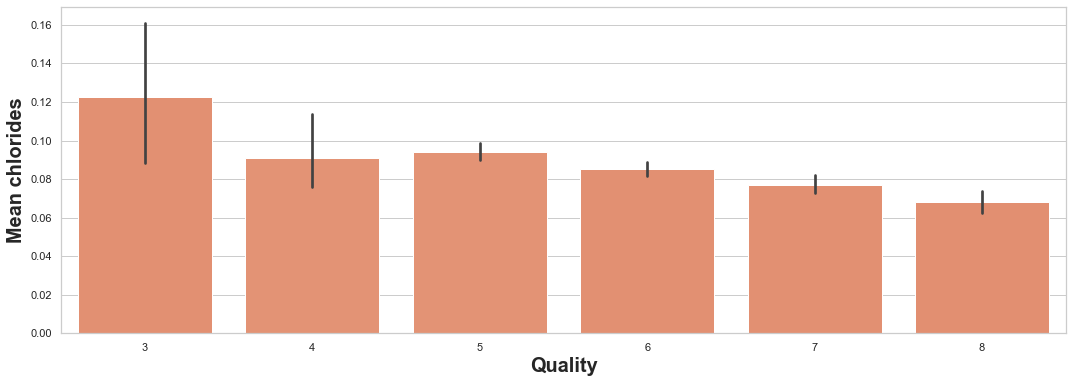

In [135]:
# chlorides vs Quality

plot = plt.figure(figsize=(18,6))
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("rocket", len(df))
array=df['chlorides']
rank = [int((max(array)-elem)*len(df)*0.75/(max(array)+1)) for elem in array] 
sns.barplot(x=df['quality'], y=df['chlorides'], data=df, palette=np.array(pal[::-1])[rank])
plt.xlabel('Quality',weight='bold', fontsize=20) 
plt.ylabel('Mean chlorides', weight='bold', fontsize=20) 
plt.show()

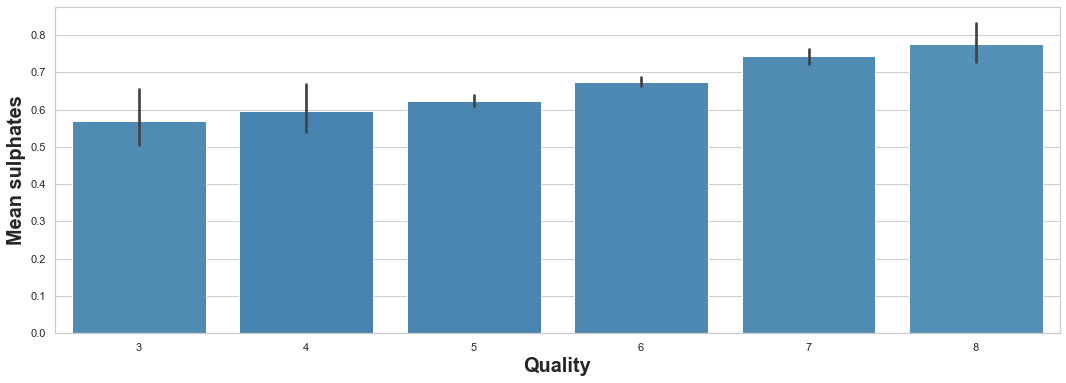

In [136]:
# sulphates vs Quality

plot = plt.figure(figsize=(18,6))
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Blues", len(df))
array=df['sulphates']
rank = [int((max(array)-elem)*len(df)*0.75/(max(array)+1)) for elem in array] 
sns.barplot(x=df['quality'], y=df['sulphates'], data=df, palette=np.array(pal[::-1])[rank])
plt.xlabel('Quality',weight='bold', fontsize=20) 
plt.ylabel('Mean sulphates', weight='bold', fontsize=20) 
plt.show()

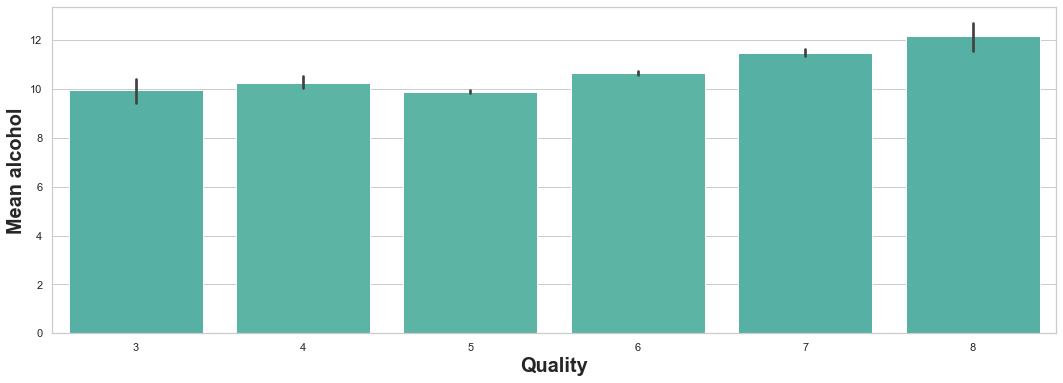

In [137]:
# alcohol vs Quality

plot = plt.figure(figsize=(18,6))
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("mako", len(df))
array=df['alcohol']
rank = [int((max(array)-elem)*len(df)*0.75/(max(array)+1)) for elem in array] 
sns.barplot(x=df['quality'], y=df['alcohol'], data=df, palette=np.array(pal[::-1])[rank])
plt.xlabel('Quality',weight='bold', fontsize=20) 
plt.ylabel('Mean alcohol', weight='bold', fontsize=20) 
plt.show()

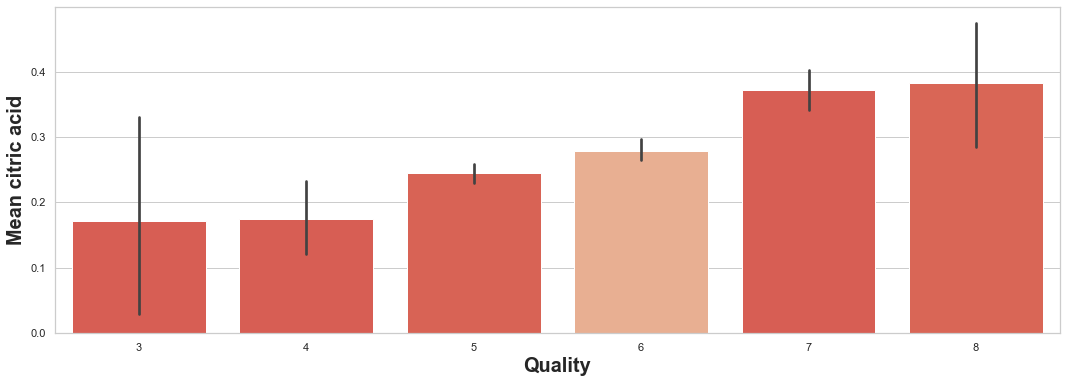

In [138]:
# citric acid vs Quality

plot = plt.figure(figsize=(18,6))
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("rocket", len(df))
array=df['citric acid']
rank = [int((max(array)-elem)*len(df)*0.75/(max(array)+1)) for elem in array] 
sns.barplot(x=df['quality'], y=df['citric acid'], data=df, palette=np.array(pal[::-1])[rank])
plt.xlabel('Quality',weight='bold', fontsize=20) 
plt.ylabel('Mean citric acid', weight='bold', fontsize=20) 
plt.show()

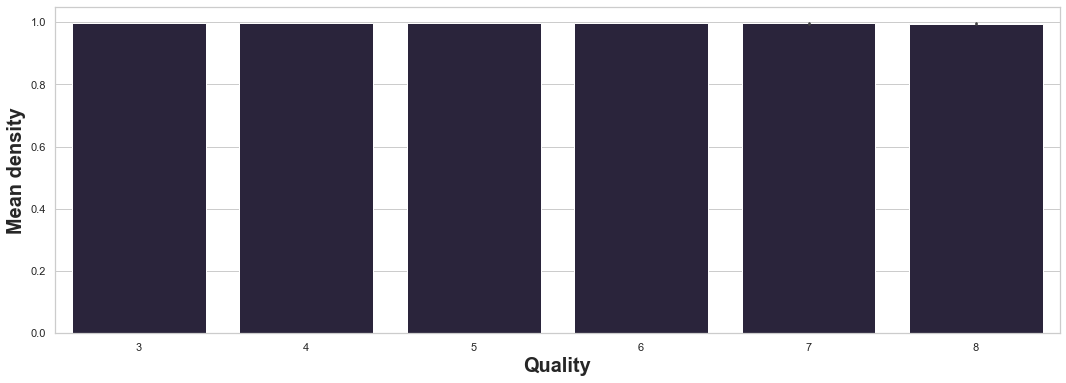

In [139]:
# density vs Quality

plot = plt.figure(figsize=(18,6))
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("ch:s=-.2,r=.6", len(df))
array=df['density']
rank = [int((max(array)-elem)*len(df)*0.75/(max(array)+1)) for elem in array] 
sns.barplot(x=df['quality'], y=df['density'], data=df, palette=np.array(pal[::-1])[rank])
plt.xlabel('Quality',weight='bold', fontsize=20) 
plt.ylabel('Mean density', weight='bold', fontsize=20) 
plt.show()

In [140]:
corr=df.corr()

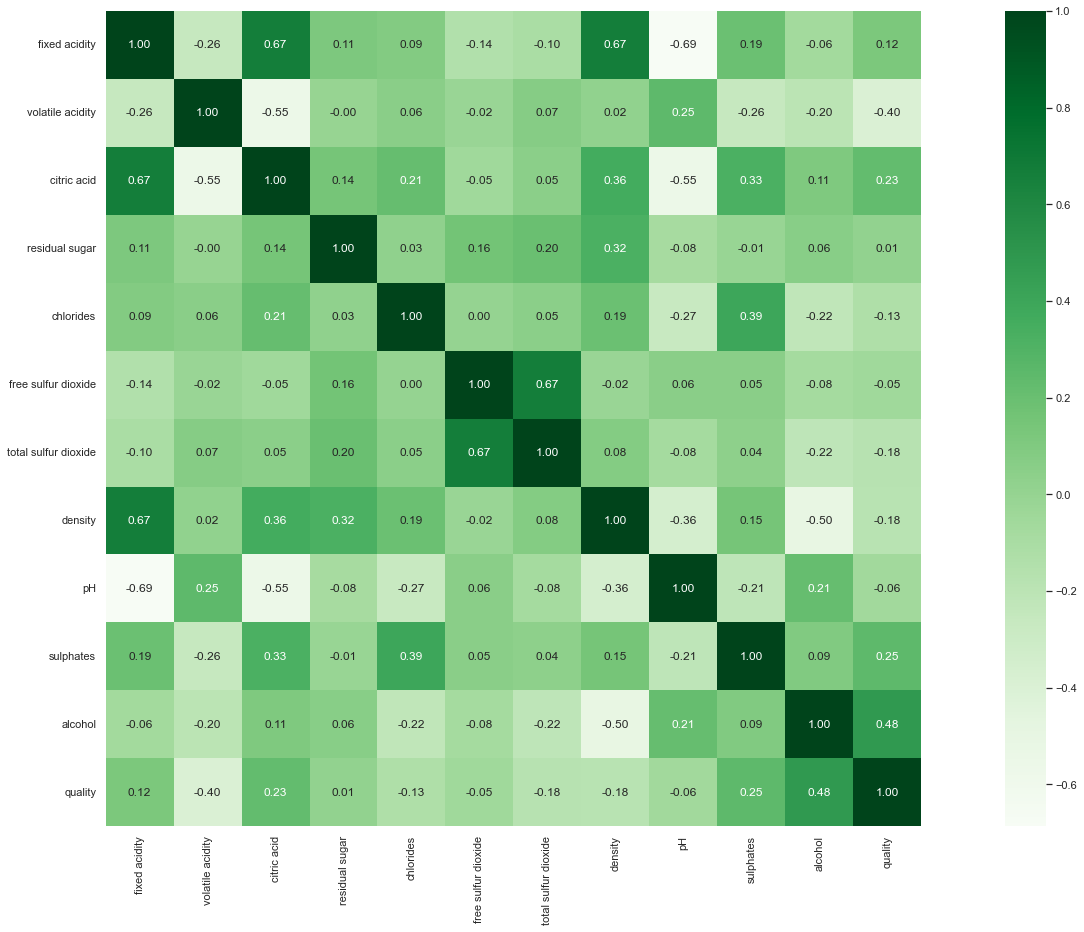

In [141]:
plt.figure(figsize=(30,15))
go=sns.heatmap(corr, cbar=True, square=True, fmt = '.2f', annot = True, annot_kws={'size':12}, cmap = 'Greens')

# Detecting Outliers and Skewness

<AxesSubplot:>

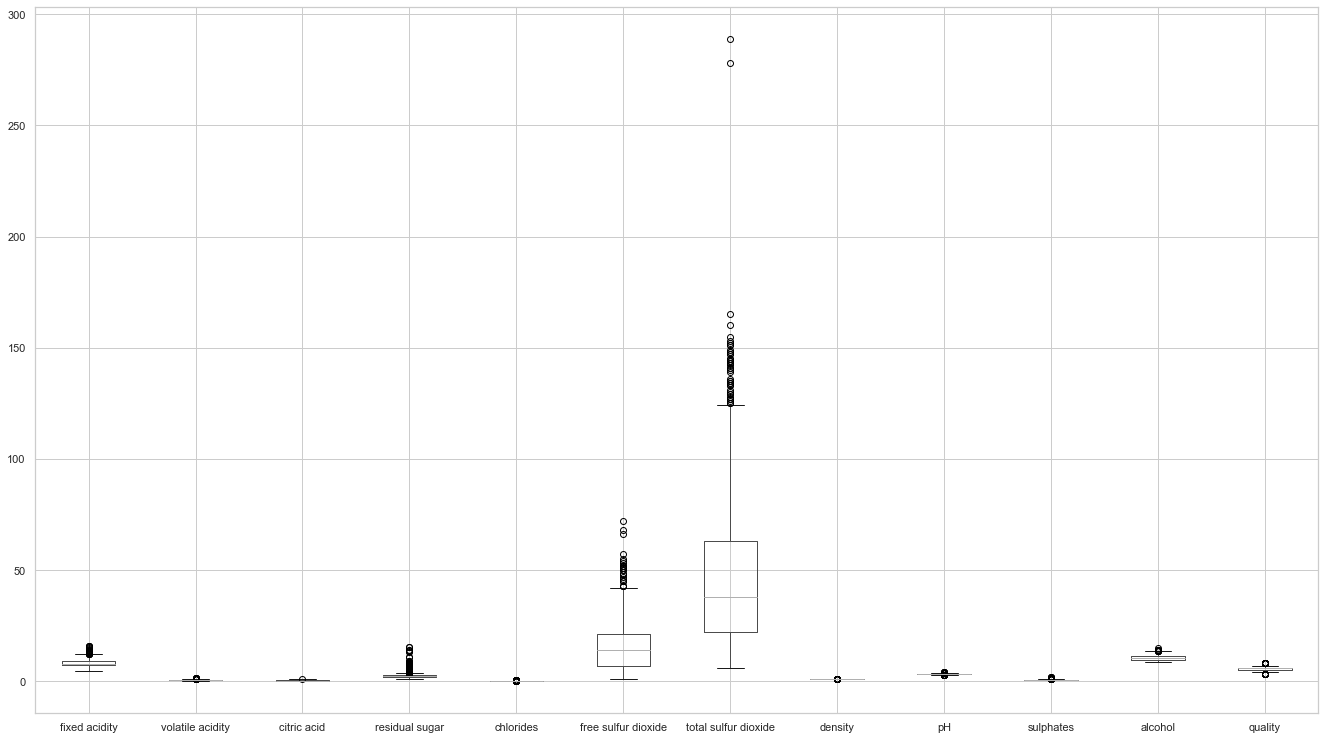

In [142]:
df.boxplot(figsize=(23,13))

In [143]:
df.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 0.192407
dtype: float64

## Square root transformation to address skewness

In [144]:
df['fixed acidity'] = np.sqrt(df['fixed acidity'])
df['volatile acidity'] = np.sqrt(df['volatile acidity'])
df['free sulfur dioxide'] = np.sqrt(df['free sulfur dioxide'])
df['total sulfur dioxide'] = np.sqrt(df['total sulfur dioxide'])
df['alcohol'] = np.sqrt(df['alcohol'])

In [145]:
import plotly.express as px

fig = px.histogram(df['residual sugar'], x="residual sugar", y="residual sugar", color=df['quality'], marginal="box")
fig.update_layout(yaxis_title='Sum of Residual Sugar', xaxis_title='Residual Sugar', title={'text': 'The Distribution of Residual Sugar by Quality','x': 0.5,'y': 0.95,'xanchor': 'center','yanchor': 'top','font': dict(size=15)})

In [146]:
fig = px.histogram(df['chlorides'], x="chlorides", y="chlorides", color=df['quality'], marginal="box")
fig.update_layout(yaxis_title='Sum of Chlorides', xaxis_title='Chlorides', title={'text': 'The Distribution of Chlorides by Quality','x': 0.5,'y': 0.95,'xanchor': 'center','yanchor': 'top','font': dict(size=15)})

In [147]:
fig = px.histogram(df['sulphates'], x="sulphates", y="sulphates", color=df['quality'], marginal="box")
fig.update_layout(yaxis_title='Sum of Sulphates', xaxis_title='Sulphates', title={'text': 'The Distribution of Sulphates by Quality','x': 0.5,'y': 0.95,'xanchor': 'center','yanchor': 'top','font': dict(size=15)})

# Feature Engineering

In [148]:
# Creating active SO2 as a feature

df['active SO2'] = df['total sulfur dioxide'] - df['free sulfur dioxide']

# Creating sweetness as a value

conditions = [
    (df['residual sugar'] <= 4),
    (df['residual sugar'] > 4) & (df['residual sugar'] <= 12),
    (df['residual sugar'] > 12) & (df['residual sugar'] <= 45),
    (df['residual sugar'] > 45)
]

choices = [1, 2, 3, 4] # 1-dry, 2-semi dry, 3-medium sweet, 4-sweet

df['sweetness'] = np.select(conditions, choices, default=np.nan)
df['sweetness'] = df['sweetness'].astype(int)

# Add low and high pH as a feature

conditions = [
    (df['pH'] <= 3.5),
    (df['pH'] >= 3.5) & ((df['pH'] < 3.6)),
    (df['pH'] >= 3.6)
]

choices = [1, 2, 3] # 1 - high, 2 - medium, 3 - low

df['pH acidity'] = np.select(conditions, choices, default=np.nan)
df['pH acidity'] = df['pH acidity'].astype(int)

# Add quality encoding

conditions = [
    (df['quality'] <= 5),
    (df['quality'] > 5)
]

choices = [0, 1] # 0 - low quality, 1 - high quality

df['quality encoding'] = np.select(conditions, choices, default=np.nan)
df['quality encoding'] = df['quality encoding'].astype(int)

# Trim the unnecessary features

df.drop('residual sugar', axis = 1, inplace=True)
df.drop('quality', axis = 1, inplace=True)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   chlorides             1359 non-null   float64
 4   free sulfur dioxide   1359 non-null   float64
 5   total sulfur dioxide  1359 non-null   float64
 6   density               1359 non-null   float64
 7   pH                    1359 non-null   float64
 8   sulphates             1359 non-null   float64
 9   alcohol               1359 non-null   float64
 10  active SO2            1359 non-null   float64
 11  sweetness             1359 non-null   int32  
 12  pH acidity            1359 non-null   int32  
 13  quality encoding      1359 non-null   int32  
dtypes: float64(11), int32(3)
memory usage: 143.3 KB


## Scaling

In [150]:
from sklearn.preprocessing import MinMaxScaler

columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

scaler = MinMaxScaler()
df[columns] = scaler.fit_transform(df[columns])

# Modelling

## Splitting the dataset 

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import time

X = df.drop('quality encoding', axis=1)
y = df['quality encoding']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

## Hyperparameter Tuning 

In [152]:
# Grid Search

def hyperp_search(classifier, parameters, cv):
    gs = GridSearchCV(classifier, parameters, cv=cv, scoring = 'f1', verbose=0, n_jobs=-1)
    tic = time.perf_counter()
    gs = gs.fit(X_train, y_train)
    toc = time.perf_counter()

    print("f1_train: %f using %s in %.3f seconds" % (gs.best_score_, gs.best_params_, toc - tic))

    best_model = gs.best_estimator_
    joblib.dump(best_model, 'model.joblib')
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    # evaluate predictions
    print("           train    test ")
    print("-------------------------")
    print("f1         %.3f    %.3f" % (f1_score(y_train, y_pred_train),
                                       f1_score(y_test, y_pred)))
    print("accuracy   %.3f    %.3f" % (accuracy_score(y_train, y_pred_train),
                                       accuracy_score(y_test, y_pred)))
    print("precision  %.3f    %.3f" % (precision_score(y_train, y_pred_train),
                                       precision_score(y_test, y_pred)))
    print("recall     %.3f    %.3f" % (recall_score(y_train, y_pred_train),
                                       recall_score(y_test, y_pred)))
    print("")


    # Calculate the ROC curve

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr) # Calculate the area under the ROC curve

    # ROC curve plot

    fig = px.area(x=fpr, y=tpr, title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})', labels=dict(x='False Positive Rate', y='True Positive Rate'), width=700, height=500)
    fig.add_shape(type='line', line=dict(dash='dash'), x0=0, x1=1, y0=0, y1=1)
    fig.show()

    # Confusion matrix plot

    cm = confusion_matrix(y_test, y_pred)

    fig = px.imshow(cm, labels=dict(x="Predicted Label", y="True Label", color="Count"), x=['Predicted 0', 'Predicted 1'], y=['Actual 0', 'Actual 1'], text_auto=True, color_continuous_scale="PuBu", title="Confusion Matrix", width=700, height=500)

    fig.show()

    return gs.best_estimator_

In [153]:
# Randomized Search

def hyperp_search_random(classifier, parameters, cv):
    gs = RandomizedSearchCV(classifier, parameters, cv=cv, scoring = 'f1', verbose=0, n_jobs=-1, random_state = 66)
    tic = time.perf_counter()
    gs = gs.fit(X_train, y_train)
    toc = time.perf_counter()

    print("f1_train: %f using %s in %.3f seconds" % (gs.best_score_, gs.best_params_, toc - tic))

    
    best_model = gs.best_estimator_
    joblib.dump(best_model, 'model.joblib')
    print(best_model.predict(X))
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    # Evaluate prediction
    print("           train    test ")
    print("-------------------------")
    print("f1         %.3f    %.3f" % (f1_score(y_train, y_pred_train),
                                       f1_score(y_test, y_pred) ))
    print("accuracy   %.3f    %.3f" % (accuracy_score(y_train, y_pred_train),
                                       accuracy_score(y_test, y_pred) ))
    print("precision  %.3f    %.3f" % (precision_score(y_train, y_pred_train),
                                       precision_score(y_test, y_pred) ))
    print("recall     %.3f    %.3f" % (recall_score(y_train, y_pred_train),
                                       recall_score(y_test, y_pred) ))
    print("")

    # Calculate the ROC curve

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr) # Calculate the area under the ROC curve

    # ROC curve plot

    fig = px.area(x=fpr, y=tpr, title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})', labels=dict(x='False Positive Rate', y='True Positive Rate'), width=700, height=500)
    fig.add_shape(type='line', line=dict(dash='dash'), x0=0, x1=1, y0=0, y1=1)
    fig.show()

    # Confusion matrix plot

    cm = confusion_matrix(y_test, y_pred)

    fig = px.imshow(cm, labels=dict(x="Predicted Label", y="True Label", color="Count"), x=['Predicted 0', 'Predicted 1'], y=['Actual 0', 'Actual 1'], text_auto=True, color_continuous_scale="PuBu", title="Confusion Matrix", width=700, height=500)
    fig.show()

    return gs.best_estimator_

# Logistic Regression

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1,10,1000], "max_iter":[500,1000,5000] }
cv = 5
best_log = hyperp_search(classifier,parameters,cv)
print(best_log)

# Finding the best features

importance_log = pd.DataFrame()
importance_log["feature"]=X_train.columns
importance_log["weight"]=best_log.coef_[0].round(2)
importance_log.sort_values(by=['weight'], inplace=True)

# Plotting the features

fig = px.bar(importance_log, x='feature', y='weight', color='feature', labels={'feature': 'Feature','weight': 'Weight'}, title='Coefficient Analysis for Logistic Regression', color_discrete_sequence=px.colors.sequential.Blues_r, text='weight')
fig.update_layout(
    xaxis=dict(tickangle=90, categoryorder='total descending'),
    legend=dict(title='Feature')
)

f1_train: 0.750456 using {'C': 10, 'max_iter': 500} in 0.335 seconds
           train    test 
-------------------------
f1         0.762    0.731
accuracy   0.751    0.732
precision  0.773    0.767
recall     0.750    0.697



LogisticRegression(C=10, max_iter=500)


# Decision Tree

In [155]:
from sklearn import tree

classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'],
              'max_depth': [4,5,6,8,10,12],
              'min_samples_split': [5,10,20],
              'min_samples_leaf': [5,10,20]}
cv = 5
best_tree = hyperp_search(classifier,parameters,cv)

# Finding the best feature

importance_tree = tree.export_text(best_tree,
                                   feature_names=X_test.columns.tolist(),
                                   max_depth=2)

print("-------------------------------")
print("The most valuable features are: ")
print("-------------------------------")
print(importance_tree)

f1_train: 0.745567 using {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 20} in 0.945 seconds
           train    test 
-------------------------
f1         0.810    0.703
accuracy   0.786    0.684
precision  0.765    0.689
recall     0.860    0.718



-------------------------------
The most valuable features are: 
-------------------------------
|--- alcohol <= 0.28
|   |--- sulphates <= 0.15
|   |   |--- density <= 0.52
|   |   |   |--- truncated branch of depth 2
|   |   |--- density >  0.52
|   |   |   |--- truncated branch of depth 2
|   |--- sulphates >  0.15
|   |   |--- total sulfur dioxide <= 0.36
|   |   |   |--- truncated branch of depth 2
|   |   |--- total sulfur dioxide >  0.36
|   |   |   |--- truncated branch of depth 2
|--- alcohol >  0.28
|   |--- alcohol <= 0.50
|   |   |--- sulphates <= 0.15
|   |   |   |--- truncated branch of depth 2
|   |   |--- sulphates >  0.15
|   |   |   |--- truncated branch of depth 2
|   |--- alcohol >  0.50
|   |   |--- volatile acidity <= 0.45
|   |   |   |--- truncated branch of depth 2
|   |   |--- volatile acidity >  0.45
|   |   |   |--- truncated branch of depth 2



# Random Forest Classifier

In [156]:
classifier = RandomForestClassifier()
parameters = {'criterion': ['entropy'],
              'n_estimators' : [50,100,500,1000],
              'max_depth': range(2,20,2),
              'min_samples_leaf':[100,250,500]}
cv = 5
best_rf = hyperp_search_random(classifier,parameters,cv)

# Finding the best feature

feature_importances = best_rf.feature_importances_
importance_rf = pd.DataFrame({'Feature': X_train.columns,
                              'Weight': feature_importances}).round(3)
importance_rf = importance_rf.sort_values(by='Weight', ascending=False)

# Plotting the features importance

fig = px.bar(importance_rf, x='Feature', y='Weight', color='Feature',
             title='Feature Importances for RandomForest Classifier',
             color_discrete_sequence=px.colors.sequential.Blues_r,
             text='Weight')

fig.update_layout(xaxis=dict(tickangle=90),
                  legend=dict(title='Feature'))

f1_train: 0.766598 using {'n_estimators': 50, 'min_samples_leaf': 100, 'max_depth': 2, 'criterion': 'entropy'} in 6.033 seconds
[0 0 0 ... 1 1 1]
           train    test 
-------------------------
f1         0.788    0.723
accuracy   0.767    0.713
precision  0.762    0.729
recall     0.816    0.718



# XGBOOST CLASSIFIER

In [157]:
from xgboost import XGBClassifier

classifier = XGBClassifier()
parameters = {"learning_rate":[0.001, 0.01, 0.1],
              "min_child_weight" : [5, 10, 20],
              "max_depth":[2,4,6,8,10,12],
              "subsample" : [0.5],
              "colsample_bytree" : [0.5],
              "enable_categorical" : [True],
              "objective" : ['binary:logistic'],
              "n_estimators":[50, 100, 500],
              "seed" :[42]}
cv = 10
best_xgb = hyperp_search_random(classifier,parameters,cv)

# Finding the best feature

feature_importances = best_xgb.feature_importances_
importance_xgb = pd.DataFrame({'Feature': X_train.columns,
                               'Weight': feature_importances}).round(3)
importance_xgb = importance_xgb.sort_values(by='Weight', ascending=False)

# Plotting the features importance

fig = px.bar(importance_xgb, x='Feature', y='Weight', color='Feature',
             title='Feature Importances for XGBoosting',
             color_discrete_sequence=px.colors.sequential.Blues_r,
             text=importance_xgb['Weight'].apply(lambda x: f'{x:.3f}'),
             hover_data=['Feature', 'Weight'])

fig.update_layout(xaxis=dict(tickangle=90), legend=dict(title='Feature'))

f1_train: 0.774660 using {'subsample': 0.5, 'seed': 42, 'objective': 'binary:logistic', 'n_estimators': 500, 'min_child_weight': 10, 'max_depth': 10, 'learning_rate': 0.001, 'enable_categorical': True, 'colsample_bytree': 0.5} in 2.101 seconds
[0 0 0 ... 1 1 1]
           train    test 
-------------------------
f1         0.804    0.743
accuracy   0.775    0.721
precision  0.747    0.714
recall     0.870    0.775



# Comparing the Models

In [158]:
import plotly.graph_objects as go

models = ["Logistic Regression",
          'Decision Tree',
          'Random Forest',
          'XGBoost']

f1_scores = [f1_score(y_test, best_log.predict(X_test)),
             f1_score(y_test, best_tree.predict(X_test)),
             f1_score(y_test, best_rf.predict(X_test)),
             f1_score(y_test, best_xgb.predict(X_test))]
accuracy_scores = [accuracy_score(y_test, best_log.predict(X_test)),
                   accuracy_score(y_test, best_tree.predict(X_test)),
                   accuracy_score(y_test, best_rf.predict(X_test)),
                   accuracy_score(y_test, best_xgb.predict(X_test))]

table = pd.DataFrame({"Model": models,
                      "F1 Score": f1_scores,
                      "Accuracy": accuracy_scores})

table = table.sort_values(by="F1 Score", ascending=False)

fig = go.Figure(data=[go.Table(
    header=dict(values=['Model',
                        'F1 Score',
                        'Accuracy']),
    cells=dict(values=[table["Model"],
                       table["F1 Score"].round(3),
                       table["Accuracy"].round(3)])
)])

fig.update_layout(
    title={
        'text': 'Comparing the models',
        'x': 0.5,
        'y': 0.9,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 15}
    },
    width=1000,
    height=400)